<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/ML%20Lab%20Final%20susmita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
#b
df=pd.read_csv('tangin.csv')
df

,SN,Age,Sex,Degree,Training,CGPA,Job Probability
0,1,25,Male,M. Sc,Yes,3.75,High
1,2,25,Female,B. Sc,Yes,3.80,Medium
2,3,3500,Male,B. Sc,No,2.25,Low
3,4,52,Female,M. Sc,Yes,3.95,High
4,5,52,Male,PhD,Yes,2.85,Medium
5,6,52,Female,B. Sc,No,NaN,Low
6,7,33,Male,PhD,No,3.85,High
7,8,22,Female,B. Sc,Yes,3.90,Medium
8,9,23,Male,B. Sc,No,2.50,Low
9,10,55,Female,PhD,No,3.00,Medium


In [ ]:
#null
df.isnull().sum()

SN                 0
Age                0
Sex                0
Degree             0
Training           0
CGPA               2
Job Probability    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp_mode= SimpleImputer (missing_values=np.nan, strategy='most_frequent')
df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,SN,Age,Sex,Degree,Training,CGPA,Job Probability
0,1,25,Male,M. Sc,Yes,3.75,High
1,2,25,Female,B. Sc,Yes,3.8,Medium
2,3,3500,Male,B. Sc,No,2.25,Low
3,4,52,Female,M. Sc,Yes,3.95,High
4,5,52,Male,PhD,Yes,2.85,Medium
5,6,52,Female,B. Sc,No,2.25,Low
6,7,33,Male,PhD,No,3.85,High
7,8,22,Female,B. Sc,Yes,3.9,Medium
8,9,23,Male,B. Sc,No,2.5,Low
9,10,55,Female,PhD,No,3.0,Medium


In [ ]:
df_imputed.isnull().sum()


SN                 0
Age                0
Sex                0
Degree             0
Training           0
CGPA               0
Job Probability    0
dtype: int64

<Axes: xlabel='Age'>

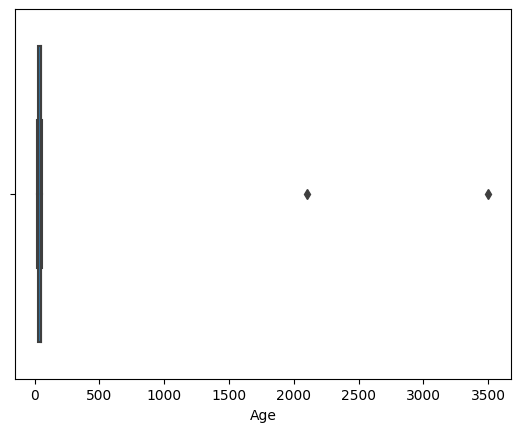

In [ ]:
#outliear
import seaborn as sns

sns.boxplot(x="Age", data=df_imputed)

In [ ]:
most_frequent_value = df["Age"].mode()[0]
most_frequent_value

52

In [ ]:
df_imputed.loc[df["Age"] == 3500, "Age"] = most_frequent_value

<Axes: xlabel='Age'>

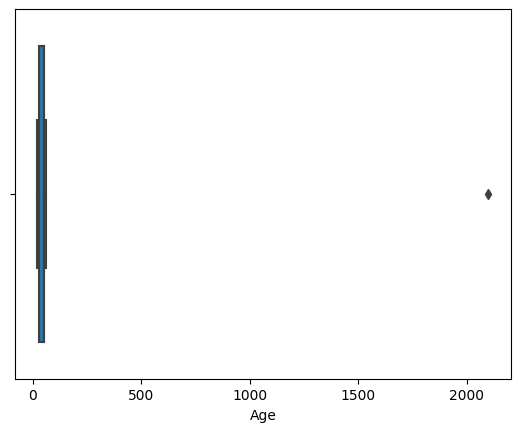

In [ ]:
import seaborn as sns

sns.boxplot(x="Age", data=df_imputed)

In [ ]:
df_imputed.loc[df["Age"] == 2100, "Age"] = most_frequent_value

<Axes: xlabel='Age'>

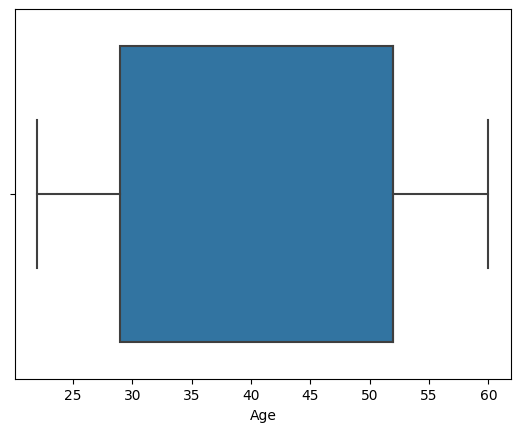

In [ ]:
import seaborn as sns

sns.boxplot(x="Age", data=df_imputed)

In [ ]:
#c
#encoding
from sklearn import preprocessing
df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,SN,Age,Sex,Degree,Training,CGPA,Job Probability
0,0,2,1,1,1,8,0
1,1,2,0,0,1,9,2
2,2,6,1,0,0,0,1
3,3,6,0,1,1,12,0
4,4,6,1,2,1,3,2
5,5,6,0,0,0,0,1
6,6,3,1,2,0,10,0
7,7,0,0,0,1,11,2
8,8,1,1,0,0,2,1
9,9,7,0,2,0,4,2


In [ ]:
X= df_enco.iloc[:,1:-1] 
y = df_enco.iloc[:,-1]

In [ ]:
X

,Age,Sex,Degree,Training,CGPA
0,2,1,1,1,8
1,2,0,0,1,9
2,6,1,0,0,0
3,6,0,1,1,12
4,6,1,2,1,3
5,6,0,0,0,0
6,3,1,2,0,10
7,0,0,0,1,11
8,1,1,0,0,2
9,7,0,2,0,4


In [ ]:
y

0     0
1     2
2     1
3     0
4     2
5     1
6     0
7     2
8     1
9     2
10    1
11    2
12    2
13    1
14    2
Name: Job Probability, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [ ]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
#skfold=StratifiedKFold(n_splits=10)
#model=DecisionTreeClassifier()
#scores=cross_val_score(model,X,y,cv=skfold)
#print(np.mean(scores))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)   #1 components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca


PCA(n_components=1)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
#d
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.819137181874612


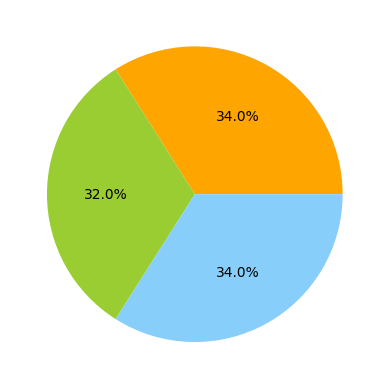

In [ ]:
#f
import matplotlib.pyplot as plt
bagging_mean = 0.962
boosting_mean = 0.906
voting_mean = 0.962


#Define the colors and explode values for the pie chart
colors = ['orange', 'yellowgreen', 'lightskyblue']


# Define the figure and axis objects
fig, ax = plt.subplots()

# Create the pie chart
ax.pie([bagging_mean, boosting_mean, voting_mean], colors=colors, autopct='%1.1f%%')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')